In [1]:
# Import Libararies
import pandas as pd
import numpy as np
import os
import plotly.express as px

In [2]:
# Get working directory
current_dir= os.getcwd()
# Go one directory up to the root directory
project_root_dir= os.path.dirname(current_dir)
project_root_dir
# Define paths to docs folder
data_dir= os.path.join(project_root_dir,'Data')
raw_dir= os.path.join(data_dir,'Raw')
processed_dir=os.path.join(data_dir,'Processed')
results_dir=os.path.join(project_root_dir,'Results')
docs_dir=os.path.join(project_root_dir,'Docs')
notebook_dir= os.path.join(project_root_dir,'Notebooks')

In [3]:
aircrash_data_filename= os.path.join(notebook_dir,"Aircrash_file.csv")
df= pd.read_csv(aircrash_data_filename, na_values='?', skipinitialspace=True)
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Sum of Ground,Sum of Fatalities (air),Sum of Aboard,Month_num,Date
0,1908,Qtr 3,September,17,United States,Wright,Wright Flyer III,virginia,Army U.S. - Military,0,1,2,9,1908-09-17
1,1909,Qtr 3,September,7,France,Wright,Wright ByplaneSC1,france,Unknown,0,1,1,9,1909-09-07
2,1912,Qtr 3,July,12,Unknown,Unknown,Dirigible,atlantic,Navy U.S. - JerseyMilitary,0,5,5,7,1912-07-12
3,1913,Qtr 3,August,6,United Kingdom,Curtiss,Curtiss seaplane,victoria british,Canada Columbia Private,0,1,1,8,1913-08-06
4,1913,Qtr 3,September,9,Unknown,Zeppelin,Zeppelin L 1 (airship),over the north seamilitary - german navy,Unknown,0,14,20,9,1913-09-09


In [4]:
df.shape

(5030, 14)

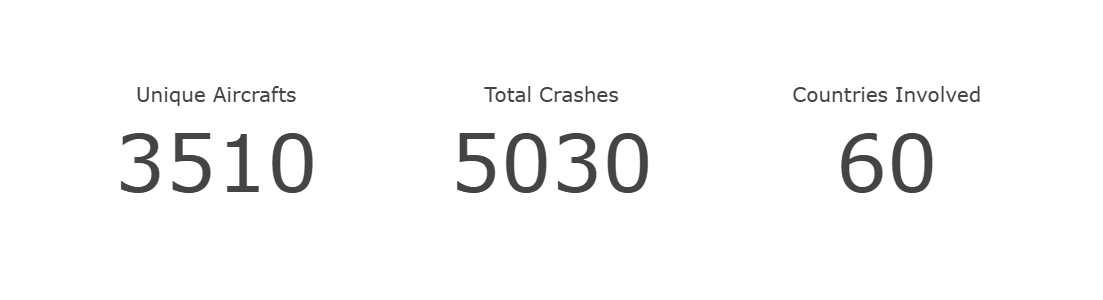

In [5]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

aircrafts = df['Aircraft'].nunique()
crashes = len(df)
countries = df['Country/Region'].nunique()

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'indicator'}]*3])

fig.add_trace(go.Indicator(
    mode="number",
    value=aircrafts,
    title={"text": "Unique Aircrafts"}), row=1, col=1)

fig.add_trace(go.Indicator(
    mode="number",
    value=crashes,
    title={"text": "Total Crashes"}), row=1, col=2)

fig.add_trace(go.Indicator(
    mode="number",
    value=countries,
    title={"text": "Countries Involved"}), row=1, col=3)

fig.update_layout(height=300, width=900, template='presentation')
fig.update_layout(template= 'presentation',paper_bgcolor= "rgba(0,0,0,0)",plot_bgcolor = "rgba(0,0,0,0)")
fig.show()
fig.write_image(os.path.join(results_dir, 'Total Crashes.jpg'))
fig.write_image(os.path.join(results_dir, 'Total Crashes.png'))
fig.write_html(os.path.join(results_dir, 'Total Crashes.html'))


### Crashes over time

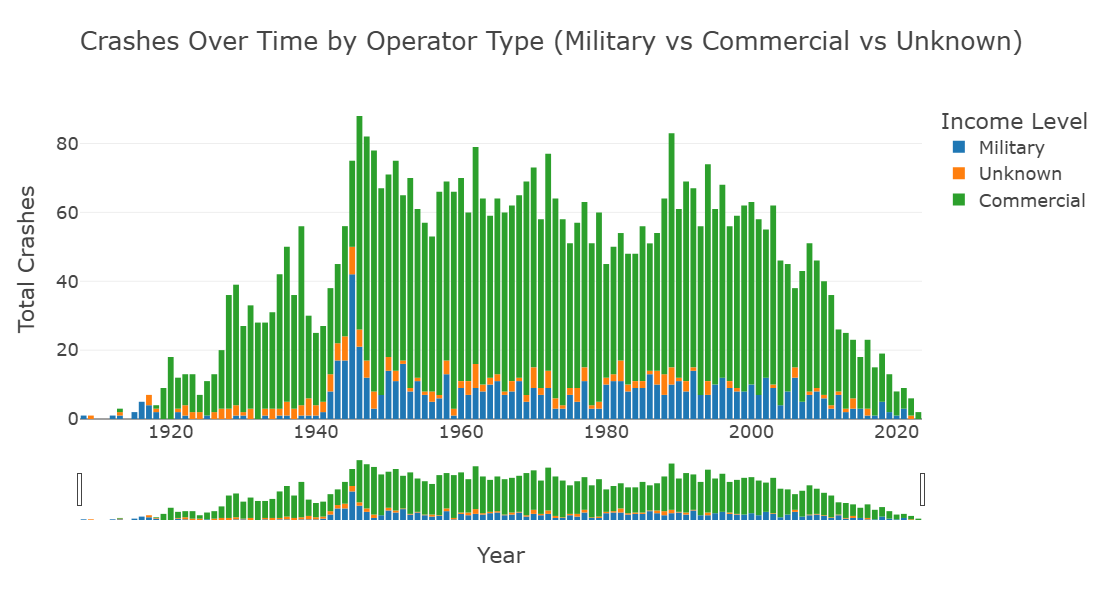

In [6]:
def classify_operator(op):
    if pd.isna(op) or op.strip().lower() in ['unknown', '', 'nan']:
        return 'Unknown'
    elif 'military' in op.lower() or 'army' in op.lower() or 'navy' in op.lower():
        return 'Military'
    else:
        return 'Commercial'

df['Operator Type'] = df['Operator'].apply(classify_operator)
crashes_by_operator = df.groupby(['Year', 'Operator Type']).size().reset_index(name='Total Crashes')

fig = px.bar(
    crashes_by_operator,
    x='Year',
    y='Total Crashes',
    color='Operator Type',
    title='Crashes Over Time by Operator Type (Military vs Commercial vs Unknown)',
    template='presentation',
    height=600
)

fig.update_layout(
    xaxis=dict(
        title='Year',
        rangeslider=dict(visible=True),
        type='linear'
    ),
    yaxis_title='Total Crashes',
    legend_title='Operator Type'
)
fig.update_layout(template = "presentation",xaxis_title="Year",
                  yaxis_title="Total Crashes",
                  legend_title=dict(text="Income Level"),
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()

fig.write_image(os.path.join(results_dir, 'Crashes Over Time by Operator Type (Military vs Commercial vs Unknown).jpg'))
fig.write_image(os.path.join(results_dir, 'Crashes Over Time by Operator Type (Military vs Commercial vs Unknown).png'))
fig.write_html(os.path.join(results_dir, 'Crashes Over Time by Operator Type (Military vs Commercial vs Unknown).html'))

In [7]:
df['Operator'].unique()

array(['Army U.S. - Military', 'Unknown', 'Navy U.S. - JerseyMilitary',
       ..., 'LATAM', 'SAS Aero', 'Aerotaxi Manaus'], dtype=object)

### Top aircraft types involved

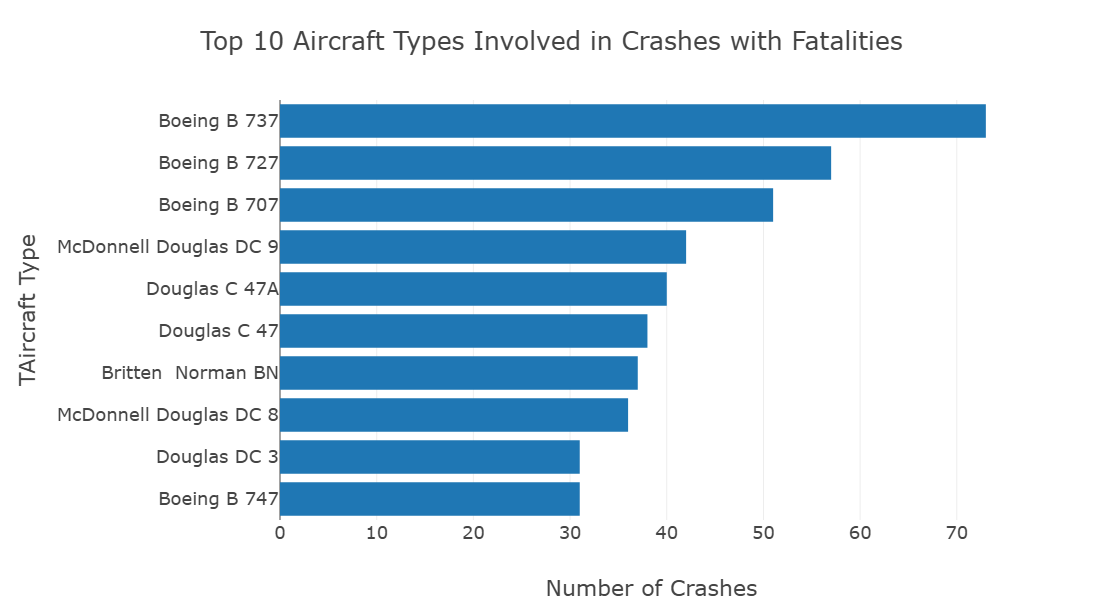

In [8]:
# Filter top 10 aircraft by number of crashes
top_aircrafts = df['Aircraft'].value_counts().nlargest(10).index
top_aircrafts_df = df[df['Aircraft'].isin(top_aircrafts)]

# Aggregate total crashes and total fatalities per aircraft
agg_data = top_aircrafts_df.groupby('Aircraft').agg(
    crash_count=('Aircraft', 'size'),
    total_fatalities=('Sum of Fatalities (air)', 'sum')
).reset_index()

# plot
fig = px.bar(
    agg_data.sort_values('crash_count'),
    x='crash_count',
    y='Aircraft',
    orientation='h',
    title='Top 10 Aircraft Types Involved in Crashes with Fatalities',
    template='presentation',
    height=600,
    hover_data={
        'crash_count': True,
        'total_fatalities': True
    },
    labels={
        'crash_count': 'Number of Crashes',
        'total_fatalities': 'Total Fatalities'
    }
)

fig.update_layout(
    yaxis_title='Aircraft Type',
    xaxis_title='Number of Crashes',
)
fig.update_layout(
    yaxis_title='Aircraft Type',
    xaxis_title='Number of Crashes',
    margin=dict(l=280) 
)
fig.update_layout(template = "presentation",xaxis_title="Number of Crashes",
                  yaxis_title="TAircraft Type",
                  legend_title=dict(text="Income Level"),
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()

fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Types Involved in Crashes with Fatalities.jpg'))
fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Types Involved in Crashes with Fatalities.png'))
fig.write_html(os.path.join(results_dir, 'Top 10 Aircraft Types Involved in Crashes with Fatalities.html'))

### Aircraft manufacturers breakdown

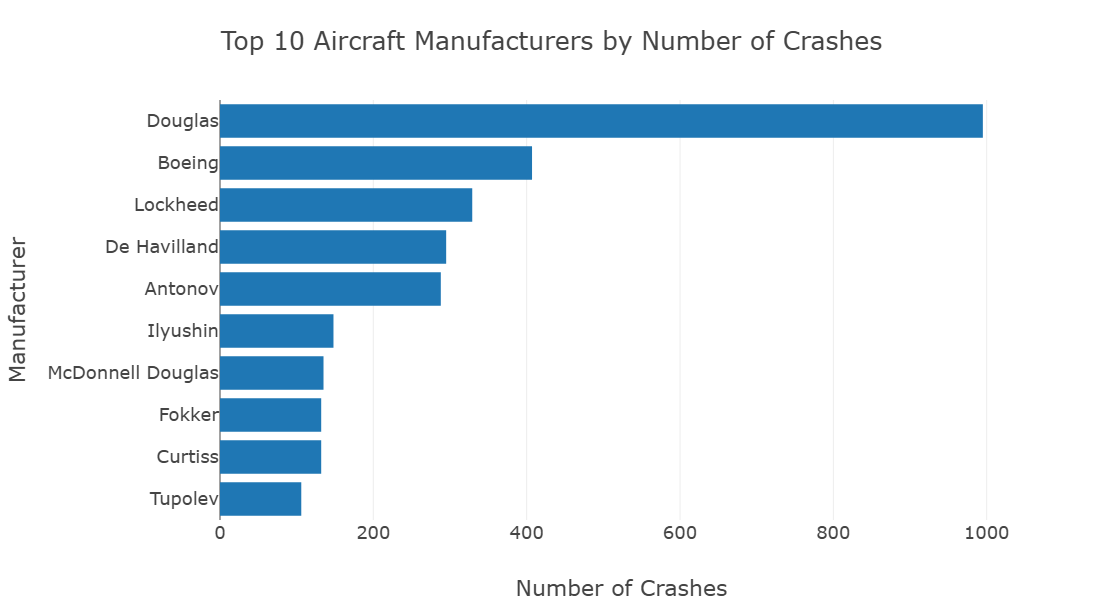

In [9]:

top_makers = df['Aircraft Manufacturer'].value_counts().nlargest(10).index

top_makers_df = df[df['Aircraft Manufacturer'].isin(top_makers)]
agg_manufacturer = top_makers_df.groupby('Aircraft Manufacturer').agg(
    crash_count=('Aircraft Manufacturer', 'size'),
    total_fatalities=('Sum of Fatalities (air)', 'sum')
).reset_index()


fig = px.bar(
    agg_manufacturer.sort_values('crash_count'),
    x='crash_count',
    y='Aircraft Manufacturer',
    orientation='h',
    title='Top 10 Aircraft Manufacturers by Number of Crashes',
    template='presentation',
    height=600,
    hover_data={
        'crash_count': True,
        'total_fatalities': True
    },
    labels={
        'crash_count': 'Number of Crashes',
        'total_fatalities': 'Total Fatalities',
        'Aircraft Manufacturer': 'Manufacturer'
    }
)


fig.update_layout(
    yaxis_title='Manufacturer',
    xaxis_title='Number of Crashes',
    margin=dict(l=220) 
)
fig.update_layout(template = "presentation",xaxis_title="Number of Crashes",
                  yaxis_title="Manufacturer",
                  legend_title=dict(text="Income Level"),
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()

fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Manufacturers by Number of Crashes.jpg'))
fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Manufacturers by Number of Crashes.png'))
fig.write_html(os.path.join(results_dir, 'Top 10 Aircraft Manufacturers by Number of Crashes.html'))


### Fatalities vs Aircraft Types (Top 10 by Fatalities)

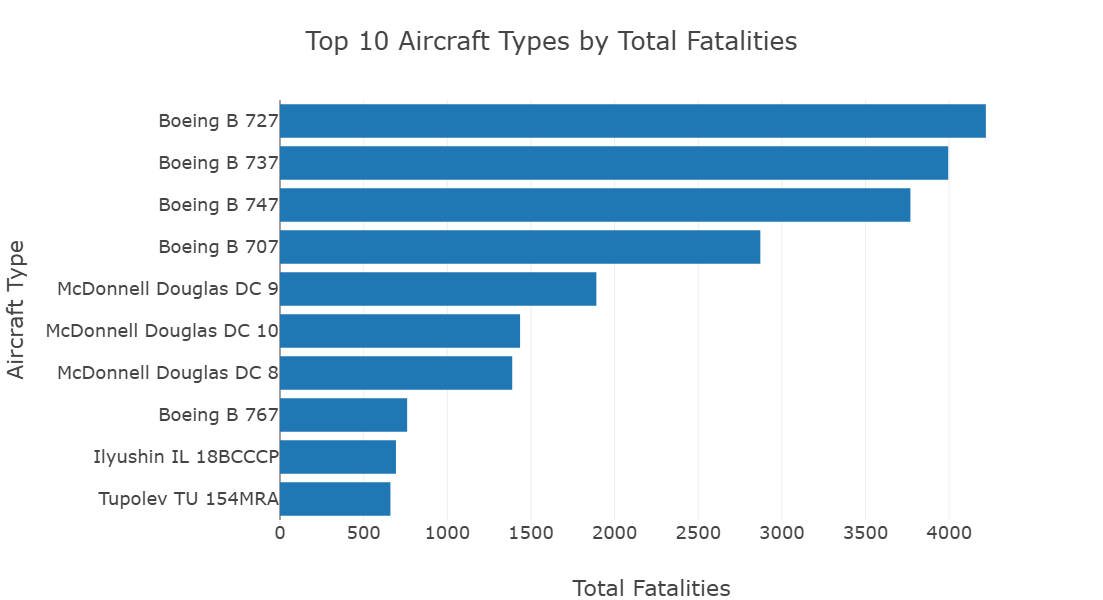

In [10]:
fatalities_by_aircraft = df.groupby('Aircraft').agg(
    total_fatalities=('Sum of Fatalities (air)', 'sum'),
    crash_count=('Aircraft', 'size')
).reset_index()


top_fatal_aircraft = fatalities_by_aircraft.nlargest(10, 'total_fatalities')


fig = px.bar(
    top_fatal_aircraft.sort_values('total_fatalities'),
    x='total_fatalities',
    y='Aircraft',
    orientation='h',
    title='Top 10 Aircraft Types by Total Fatalities',
    template='presentation',
    height=600,
    hover_data={
        'crash_count': True,
        'total_fatalities': True
    },
    labels={
        'total_fatalities': 'Total Fatalities',
        'crash_count': 'Number of Crashes',
        'Aircraft': 'Aircraft Type'
    }
)


fig.update_layout(
    yaxis_title='Aircraft Type',
    xaxis_title='Total Fatalities',
    margin=dict(l=280)
)
fig.update_layout(template = "presentation",xaxis_title="Total Fatalities",
                  yaxis_title="Aircraft Type",
                  legend_title=dict(text="Income Level"),
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()
fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Types by Total Fatalities.jpg'))
fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Types by Total Fatalities.png'))
fig.write_html(os.path.join(results_dir, 'Top 10 Aircraft Types by Total Fatalities.html'))


In [11]:
### 

### Fatalities per operator

In [13]:

fig = px.bar(
    fatalities_by_operator,
    x='Total Fatalities',
    y='Operator Type',
    orientation='h',
    title='Total Fatalities by Operator Type',
    template='presentation',
    color='Operator Type',
    color_discrete_map={
        'Military': 'indianred',
        'Commercial': 'royalblue',
        'Unknown': 'gray'
    },
    height=400
)

fig.update_layout(
    xaxis_title='Total Fatalities',
    yaxis_title='Operator Type',
    margin=dict(l=150)
)

fig.show()


NameError: name 'fatalities_by_operator' is not defined

### Crashes involving ground deaths

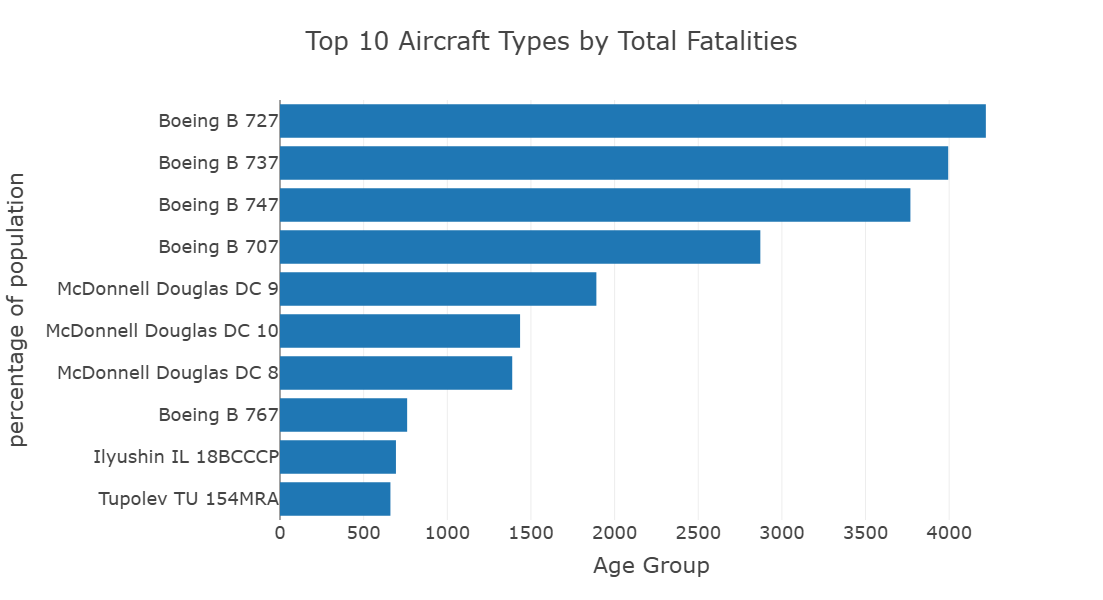

In [14]:
crashes_with_ground_deaths = df[df['Sum of Ground'] > 0].copy()
total_ground_deaths = df['Sum of Ground'].sum()
total_air_deaths = df['Sum of Fatalities (air)'].sum()

# fig.update_layout(template = "presentation",xaxis_title="Age Group",
#                   yaxis_title="percentage of population",
#                   legend_title=dict(text="Income Level"),
#                   xaxis_title_standoff=50,
#                   paper_bgcolor = "rgba(0, 0, 0, 0)",
#                   plot_bgcolor = "rgba(0, 0, 0, 0)"
#                  )

# fig.show()
# fig.write_image(os.path.join(result_dir, 'Income_distribution_by_agegroup_bar_plot.jpg'))
# fig.write_image(os.path.join(results_dir, 'Income_distribution_by_agegroup_bar_plot.png'))
# fig.write_html(os.path.join(result_dir, 'Income_distribution_by_agegroup_bar_plot.html'))

In [16]:
jupyter bextension enable --py widgetsnbextension


SyntaxError: invalid syntax (1196310908.py, line 1)